In [28]:
import pandas as pd
import numpy as np

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.dtypes
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:

class LogisticRegression:
    def __init__(self):
        self.betas = []
        self.is_binary = True
        
        
    def concat_ones(self,x):
        ones = np.ones((x.shape[0], 1))
        return np.concatenate([ones, x], axis = 1)
    
    
    def fit(self, x, y):
        if len(y.shape)> 1 and y.shape[1] > 1:
            self.is_binary = False
        x = self.concat_ones(x)
        xt = x.T
        xtx = np.dot(xt, x)
        xtxinv = np.linalg.inv(xtx)    
        xty = np.dot(xt, y)
        self.betas = np.dot(xtxinv, xty)
        
        
    def predict_proba(self, x):
        x = self.concat_ones(x)
        z = np.dot(x, self.betas)
        if self.is_binary:
            return 1 /(1+ np.exp(-z))
        else:
            return np.exp(z) / np.sum(np.exp(z))  
          
        
    def predict(self, x):
        prob = self.predict_proba(x)
        if self.is_binary:
            return np.where(prob >= 0.6, 1, 0)
        else:
            return np.arg
        
        
        max(prob, axis = 1)
        
        
    def score(self, x, y): #accuracy
        pred = self.predict(x)
        correct = np.argwhere(pred == y).ravel()
        return len(correct) / len(y)    

In [31]:
x, y = df.values[:, :-1], df.values[:, -1]
lr = LogisticRegression()
lr.fit(x,y)
probs = lr.predict_proba(x)
pred = lr.predict(x)
pred_df = pd.DataFrame(zip(y, probs, pred), columns = ['y', 'probs', 'pred'])
pred_df 


,y,probs,pred
0,1.0,0.657406,1
1,0.0,0.501433,0
2,1.0,0.676213,1
3,0.0,0.494519,0
4,1.0,0.697029,1
...,...,...,...
763,0.0,0.592359,0
764,0.0,0.588731,0
765,0.0,0.560346,0
766,1.0,0.585641,0


In [62]:
def confusion_matrix(y_true, y_pred):
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    n_classes = len(np.unique(y_true))
    cm = np.zeros((n_classes, n_classes), dtype = int) 
    for i, j in zip(y_true, y_pred): 
        cm[i][j] += 1 
    return cm

In [51]:
cm = confusion_matrix(y, pred)

Text(0.5, 1.0, 'Confusion Matrix')

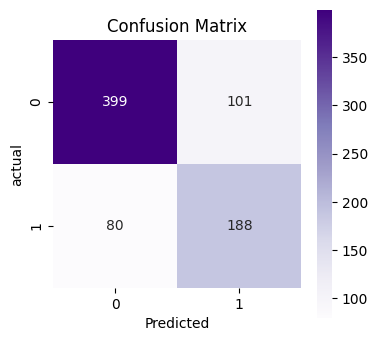

In [52]:
import seaborn as sbn
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4, 4))
ax = fig.gca()
sbn.heatmap(cm, annot = True, fmt ='d', square = True, cmap='Purples')
ax.set_xlabel('Predicted')
ax.set_ylabel('actual')
ax.set_title('Confusion Matrix') 

In [54]:
cm.diagonal().sum() / cm.sum(), lr.score(x,y) #[Accuracy = TP+TN / TOTAL], (LinearRegression)

(np.float64(0.7643229166666666), 0.7643229166666666)

In [57]:
import seaborn as sbn

df = sbn.load_dataset('iris').sample(frac = 1, random_state = 1)
df.reset_index(drop = True, inplace = True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,4.0,1.2,0.2,setosa
1,5.1,2.5,3.0,1.1,versicolor
2,6.6,3.0,4.4,1.4,versicolor
3,5.4,3.9,1.3,0.4,setosa
4,7.9,3.8,6.4,2.0,virginica


In [60]:
df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
x = df.values[:, :-1]
y = df.values[:, -1].astype(int)
x.shape, y.shape

((150, 4), (150,))

In [63]:
y_cat = np.eye(len(np.unique(y)))[y] #Label Encoding
y[:5], y_cat[:5]

(array([0, 1, 1, 0, 2]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.]]))

In [64]:
lr = LogisticRegression()
lr.fit(x, y_cat)
prob = lr.predict_proba(x)
pred = lr.predict(x)
pred_df = pd.DataFrame(zip(y, prob, pred), columns=['y', 'probs', 'pred'])
pd.set_option('display.max_colwidth', 500)
pred_df.head()

,y,probs,pred
0,0,"[0.0048941907963075066, 0.001271489812695234, 0.0014353328047163735]",0
1,1,"[0.0020574102626835936, 0.0023989949836777553, 0.0018096565123445405]",1
2,1,"[0.0018407164051877148, 0.0021872742751036507, 0.002218483809644529]",2
3,0,"[0.004496916760467899, 0.001241124712685218, 0.0016003542217506508]",0
4,2,"[0.0015015140629608848, 0.001724121770084716, 0.003450237983646019]",2


In [65]:
cm = confusion_matrix(y, pred)
cm

array([[50,  0,  0],
       [ 0, 34, 16],
       [ 0,  7, 43]])

Text(0.5, 1.0, 'Confusion Matrix')

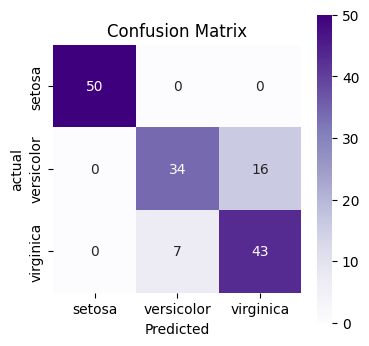

In [71]:
import seaborn as sbn
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4, 4))
ax = fig.gca()
sbn.heatmap(cm, annot = True, fmt ='d', square = True, cmap='Purples')
ax.set_xlabel('Predicted')
ax.set_ylabel('actual')
ax.set_xticklabels(['setosa','versicolor', 'virginica'])
ax.set_yticklabels(['setosa','versicolor', 'virginica'])
ax.set_title('Confusion Matrix') 